<a href="https://colab.research.google.com/github/SubashKhatiwada11/Data-Science-project900-/blob/main/Missing_values_handling(Project_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset


In [ ]:
#https://colab.research.google.com/drive/1Rf5bjnfBs-brXKj9hT9hNGVW-WVrMS8W?usp=sharing


## Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("hr.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                      object
promotion_last_5years      int64
Department                object
salary                    object
age                      float64
dtype: object

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,0.144561,0.021261,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,0.351670,0.144258,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,29.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


# There are 15004 entries in total, however we notice significant discrepancies in salary and age, leading us to believe that some data is missing.

In [ ]:
df.shape

(15004, 11)

In [ ]:
df.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

In [ ]:
df.isnull().sum()/len(df)

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     0.000000
time_spend_company       0.000000
Work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
Department               0.000000
salary                   0.001933
age                      0.794721
dtype: float64

<Axes: >

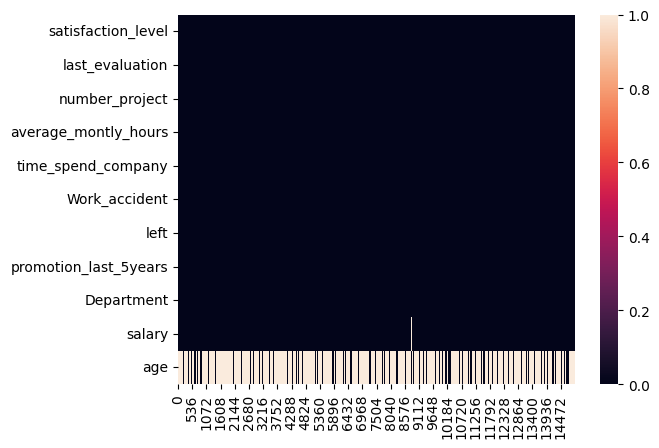

In [ ]:
sns.heatmap(df.isna().transpose())

##HANDLING MISSING VALUE

##There are many approaches to handling the data set's missing values, and we will go over some of them below.

1 Deletion :
 Deleting columns with missing values. If we have columns that have extremely high missing values in them(say 70% of the data in the columns is missing), then we can delete these columns. To do this you can first get the percentage of the missing values in your columns.2. Deleting rows with missing values. If we have rows that have extremely high missing values in them(say 70% of the data in the rows is missing), then we can delete these rows. But is not a rule.

2 Imputation  :Mean,Median and Mode

This is one of the most common methods of imputing values when dealing with missing data. In cases where there are a small number of missing observations, data scientists can calculate the mean or median of the existing observations.

3 Time-Series Specific Methods

4 Interpolation

5 Dropping Variables











In [ ]:
# Around 1% data is missing in Salary Column
# Around 80% data is missing in Age  Column

In [ ]:
# Almost 80 % missing  data in age column so we drop age column.
df.drop(columns = ['age'] , inplace = True)

In [ ]:
df.isna().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
Department                0
salary                   29
dtype: int64

<Axes: xlabel='salary', ylabel='Count'>

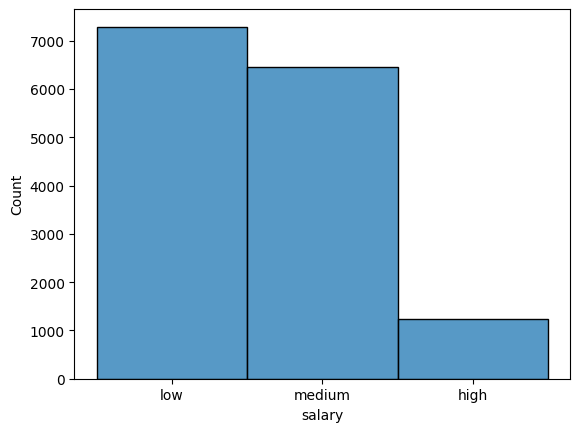

In [ ]:
# Since 1% of data is missing in salary data we use imputation method in this case.

# Analyse the data of distribution in salary
sns.histplot(df.salary)

Replace the missing values with Mean Values


In [ ]:
salary_mean = df.salary.mean


In [ ]:
salary_mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0           low
1        medium
2        medium
3          high
4          high
          ...  
14999    medium
15000       low
15001    medium
15002       low
15003    medium
Name: salary, Length: 15004, dtype: object>

In [ ]:
df.salary.fillna(salary_mean, inplace = True)
df.salary.value_counts(normalize = True)

low                                                                                                                                                                                                                                                                    0.485804
medium                                                                                                                                                                                                                                                                 0.429819
high                                                                                                                                                                                                                                                                   0.082445
<bound method Series.mode of 0           low\n1        medium\n2        medium\n3          high\n4          high\n          ...  \n14999    medium\n15000       low\n15001    medium\n15

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## In this way we can Handle the  missing values in a certain dataset.As there are different methods in accordance with the dataset and its outliers dependencies we need to apply as per the data scenario.